<a href="https://colab.research.google.com/github/AnDu123-max/Mine-vs-Rock/blob/main/Mine_Vs_Rock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


Accuracy on training data: 0.9198
Accuracy on test data:     0.7619

Classification report (test data):
              precision    recall  f1-score   support

           M     0.7500    0.8182    0.7826        11
           R     0.7778    0.7000    0.7368        10

    accuracy                         0.7619        21
   macro avg     0.7639    0.7591    0.7597        21
weighted avg     0.7632    0.7619    0.7608        21

Confusion matrix (rows: true, columns: predicted):
          R (Rock)  M (Mine)
R (Rock)         7         3
M (Mine)         2         9


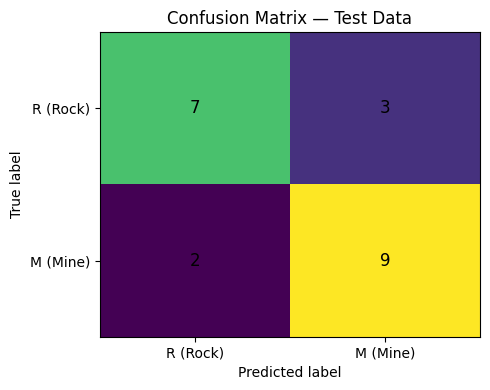


Prediction for the provided input sample: R
Interpreted class: ROCK


In [3]:
sonar_data = pd.read_csv('sonar data.csv', header=None)
X = sonar_data.drop(columns=60, axis=1)
y = sonar_data[60]

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=1)

#build pipeline
pipeline = make_pipeline(StandardScaler(),LogisticRegression(solver='liblinear', max_iter=200))
pipeline.fit(X_train, y_train)


#evaluation metric
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on training data: {train_acc:.4f}")
print(f"Accuracy on test data:     {test_acc:.4f}\n")
print("Classification report (test data):")
print(classification_report(y_test, y_test_pred, digits=4))

#confusion matrix and evaluation
cm = confusion_matrix(y_test, y_test_pred, labels=["R", "M"])
labels = ["R (Rock)", "M (Mine)"]

print("Confusion matrix (rows: true, columns: predicted):")
print(pd.DataFrame(cm, index=labels, columns=labels))



#plot confusion matrix
fig, ax = plt.subplots(figsize=(5,4))
im = ax.imshow(cm, interpolation='nearest', aspect='auto')
ax.set_title("Confusion Matrix — Test Data")
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)



#annotate counts
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                fontsize=12)

ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
fig.tight_layout()
plt.show()


#predict new sample
input_data = (
    0.0100, 0.0171, 0.0623, 0.0205, 0.0205, 0.0368, 0.1098, 0.1276, 0.0598, 0.1264,
    0.0881, 0.1992, 0.0184, 0.2261, 0.1729, 0.2131, 0.0693, 0.2281, 0.4060, 0.3973,
    0.2741, 0.3690, 0.5556, 0.4846, 0.3140, 0.5334, 0.5256, 0.2520, 0.2090, 0.3559,
    0.6260, 0.7340, 0.6120, 0.3497, 0.3953, 0.3012, 0.5408, 0.8814, 0.9857, 0.9167,
    0.6121, 0.5006, 0.3210, 0.3202, 0.4295, 0.3654, 0.2655, 0.1576, 0.0681, 0.0294,
    0.0241, 0.0121, 0.0036, 0.0150, 0.0085, 0.0073, 0.0050, 0.0044, 0.0040, 0.0117
)
input_array = np.asarray(input_data).reshape(1, -1)
prediction = pipeline.predict(input_array)[0]
print(f"\nPrediction for the provided input sample: {prediction}")
if prediction == 'R':
    print("Interpreted class: ROCK")
else:
    print("Interpreted class: MINE")






